# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
# Daniel Shapira 208310607
# Details Student 2:
# Daniel Papkov 211516232

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# pip install wn
# python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

d:\Git\NLP-Project


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

This code segment processes a dataset of stories in various languages and extracts the Hebrew stories. It identifies Hebrew words by checking their type and then reconstructs each story in Hebrew format. The resulting collection of Hebrew stories is stored in the final_stories list.

In [11]:

final_stories =[] ## this will be the final list of stories that are in hebrew
for story in df_train.story:
    tokens=ht.tokenize(story)
    hebrew_words=[] ## list of the words in hebrew after filtered
    for _type,token,_ ,_  in tokens:## we dont need _1 and _2 they are just place holders
        if(_type=="HEBREW"):
            hebrew_words.append(token)
    single_story_in_hebrew = " ".join(hebrew_words)## add all the words in the order they apeard back such that they are seperated by space
    final_stories.append(single_story_in_hebrew) ## add each story back to the dataframe 
    ##print (single_story_in_hebrew)


Then we proceeds to train K-Nearest Neighbors (KNN) models using two different vectorization techniques: TF-IDF (using TfidfVectorizer) and Count-based (using CountVectorizer). Each vectorization approach is performed with a limited set of the most frequent 1000 features.

For each vectorization method, two KNN models are trained: one with n_neighbors set to 1 and another with n_neighbors set to 3. 

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)
# Training KNN models with n_neighbors values of 1 and 3 using TfidfVectorizer and CountVectorizer
vectorizers = [TfidfVectorizer(max_features = 1000), CountVectorizer(max_features = 1000)]
vectorizer_names = ['TfidfVectorizer', 'CountVectorizer']
n_neighbors_values = [1, 3]

for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for n_neighbors in n_neighbors_values:
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_model.fit(X_train_vectorized, Y_train)
        y_pred = knn_model.predict(X_test_vectorized)
        knn_f1_score = f1_score(Y_test, y_pred, average='weighted')

        print(f"F1-score for KNN with n_neighbors={n_neighbors} using {vectorizer_name}: {knn_f1_score}")

KNeighborsClassifier(n_neighbors=1)

F1-score for KNN with n_neighbors=1 using TfidfVectorizer: 0.6864223655030173


KNeighborsClassifier(n_neighbors=3)

F1-score for KNN with n_neighbors=3 using TfidfVectorizer: 0.727209918760575


KNeighborsClassifier(n_neighbors=1)

F1-score for KNN with n_neighbors=1 using CountVectorizer: 0.7118566763359058


KNeighborsClassifier(n_neighbors=3)

F1-score for KNN with n_neighbors=3 using CountVectorizer: 0.6873283799063157


#### Here we can see that the best score we got is with KNN is using ####
#### with n_neighbors=3 and TfidfVectorizer: 0.727209918760575 ####


#### Now we will try to apply clustering using K-Means algorithm on the vectorized representations of the text. Two vectorization techniques, TF-IDF and Count-based, are utilized (TfidfVectorizer and CountVectorizer). For each vectorization approach, the code iterates through a range of n_clusters values: 2, 3, 4, and 5. ####

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)
n_clusters_values = [2, 3, 4, 5]

for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for n_clusters in n_clusters_values:
        kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans_model.fit(X_train_vectorized)
        cluster_labels = kmeans_model.predict(X_test_vectorized)
        
        # Convert cluster labels to original class labels
        cluster_labels_mapped = ['f' if label == 0 else 'm' for label in cluster_labels]

        kmeans_f1_score = f1_score(Y_test, cluster_labels_mapped, average='weighted')

        print(f"F1-score for KMeans with n_clusters={n_clusters} using {vectorizer_name}: {kmeans_f1_score}")

KMeans(n_clusters=2, random_state=0)

F1-score for KMeans with n_clusters=2 using TfidfVectorizer: 0.45681627544901254


KMeans(n_clusters=3, random_state=0)

F1-score for KMeans with n_clusters=3 using TfidfVectorizer: 0.6500981080319332


KMeans(n_clusters=4, random_state=0)

F1-score for KMeans with n_clusters=4 using TfidfVectorizer: 0.6639697889633132


KMeans(n_clusters=5, random_state=0)

F1-score for KMeans with n_clusters=5 using TfidfVectorizer: 0.5780590230871051


KMeans(n_clusters=2, random_state=0)

F1-score for KMeans with n_clusters=2 using CountVectorizer: 0.5501992468137173


KMeans(n_clusters=3, random_state=0)

F1-score for KMeans with n_clusters=3 using CountVectorizer: 0.5864795822195572


KMeans(n_clusters=4, random_state=0)

F1-score for KMeans with n_clusters=4 using CountVectorizer: 0.6223133930087572


KMeans(n_clusters=5, random_state=0)

F1-score for KMeans with n_clusters=5 using CountVectorizer: 0.6122292606456154


#### We can see that the best result we got is F1-score for KMeans with n_clusters=4 using TfidfVectorizer: 0.6639697889633132 ####


#### 
Now we will try to apply a Perceptron model! We start with its initialization, trained using the TF-IDF-transformed training data, and employed to predict gender labels on the test data. The F1 score is calculated and printed as a performance metric. Additionally, a confusion matrix is generated based on the predictions and actual labels, followed by a heatmap visualization of the matrix. This code efficiently employs TF-IDF features to train a Perceptron model for gender classification and evaluates its effectiveness through F1 score and a visualized confusion matrix.
####

Perceptron()

F1 Score: 0.7620


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Labels')

Text(70.72222222222221, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

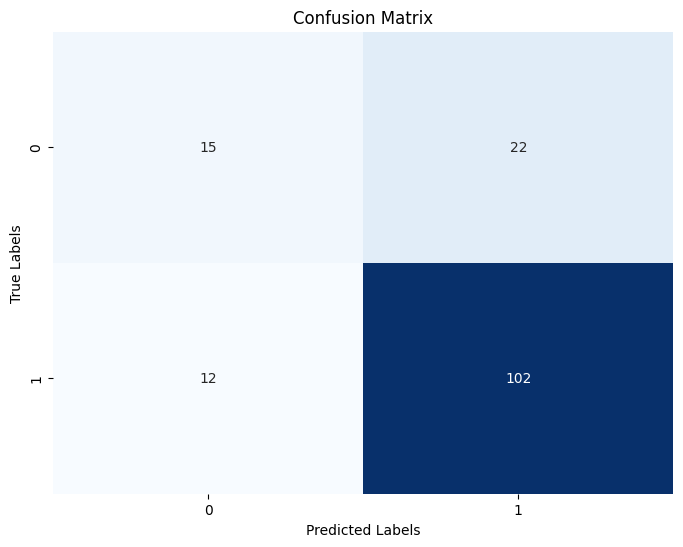

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000) 
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

perc = Perceptron()
perc.fit(x_train_tfidf, Y_train)
y_pred = perc.predict(x_test_tfidf)

# Calculate F1 score
f1 = f1_score(Y_test, y_pred, average='weighted')  # You can change 'weighted' to other options if needed
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Create a heatmap with the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Checking Perceptron with CountVectorizer ####

Perceptron()

F1 Score: 0.7080


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Labels')

Text(70.72222222222221, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

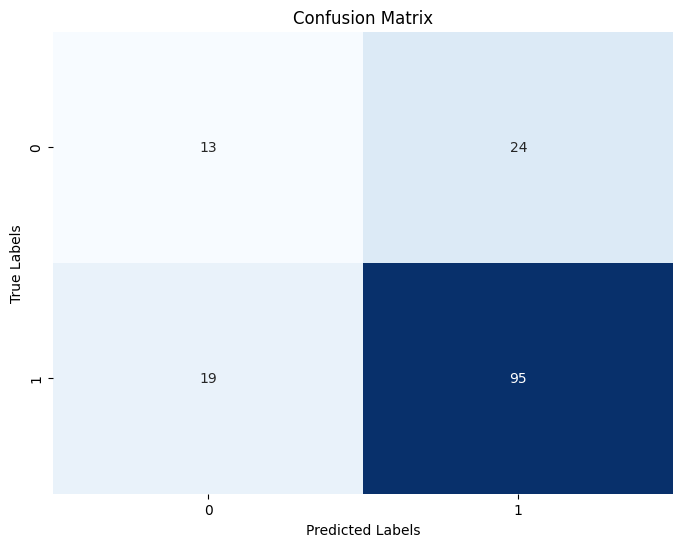

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=1000) 
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

perc = Perceptron()
perc.fit(x_train_tfidf, Y_train)
y_pred = perc.predict(x_test_tfidf)

f1 = f1_score(Y_test, y_pred, average='weighted')  # You can change 'weighted' to other options if needed
print(f"F1 Score: {f1:.4f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Create a heatmap with the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

We can see a very good score of 0.76 which is right where we want our score to be

Lets use KFold CrossValidation to further improve our results starting with KNN


In [17]:
from sklearn.model_selection import KFold

In [27]:
def k_fold_cross_validation_knn(X, y, vectorizer, n_neighbors_values, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    X_vectorized = vectorizer.fit_transform(X)
    vectorizer_name = type(vectorizer).__name__
    
    model_name = "KNeighborsClassifier"
    
    for n_neighbors in n_neighbors_values:
        model_instance = KNeighborsClassifier(n_neighbors=n_neighbors)  # Initialize KNN model instance
        
        f1_scores = []  # To store F1 scores for each fold
        
        for train_index, val_index in kf.split(X_vectorized):
            X_train_fold, X_val_fold = X_vectorized[train_index], X_vectorized[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
            
            model_instance.fit(X_train_fold, y_train_fold)
            y_val_pred = model_instance.predict(X_val_fold)
            f1_fold = f1_score(y_val_fold, y_val_pred, average='weighted')
            f1_scores.append(f1_fold)
        
        average_f1 = sum(f1_scores) / num_folds
        
        print(f"F1-score for {model_name} with n_neighbors={n_neighbors} using {vectorizer_name}: {average_f1:.4f}")

In [28]:
#usage for KNeighborsClassifier on 1,3,5,7,9 neighbors
vectorizer_knn = TfidfVectorizer(max_features=1000)
k_fold_cross_validation_knn(final_stories, df_train['gender'], vectorizer_knn, [1, 3, 5, 7, 9])
vectorizer_knn = CountVectorizer(max_features=1000)
k_fold_cross_validation_knn(final_stories, df_train['gender'], vectorizer_knn, [1, 3, 5, 7, 9])

F1-score for KNeighborsClassifier with n_neighbors=1 using TfidfVectorizer: 0.7031
F1-score for KNeighborsClassifier with n_neighbors=3 using TfidfVectorizer: 0.7040
F1-score for KNeighborsClassifier with n_neighbors=5 using TfidfVectorizer: 0.7070
F1-score for KNeighborsClassifier with n_neighbors=7 using TfidfVectorizer: 0.6985
F1-score for KNeighborsClassifier with n_neighbors=9 using TfidfVectorizer: 0.6978
F1-score for KNeighborsClassifier with n_neighbors=1 using CountVectorizer: 0.6942
F1-score for KNeighborsClassifier with n_neighbors=3 using CountVectorizer: 0.6817
F1-score for KNeighborsClassifier with n_neighbors=5 using CountVectorizer: 0.6811
F1-score for KNeighborsClassifier with n_neighbors=7 using CountVectorizer: 0.6938
F1-score for KNeighborsClassifier with n_neighbors=9 using CountVectorizer: 0.6832


Now lets use KFold CrossValidation using Perceptron

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron

# Read the train and test data
train_filename = 'annotated_corpus_for_train.csv'
test_filename = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

# Separate the train data into stories and labels
final_stories = df_train['story']
y_train = df_train['gender']

# Initialize vectorizers
vectorizer_perceptron_tfidf = TfidfVectorizer(max_features=1000)
vectorizer_perceptron_count = CountVectorizer(max_features=1000)

model_instance = Perceptron()

# Create a pipeline for TF-IDF vectorizer and Perceptron
pipeline_tfidf = Pipeline([
    ('tfidf_vectorizer', vectorizer_perceptron_tfidf),
    ('perceptron', model_instance)
])

# Create a pipeline for Count vectorizer and Perceptron
pipeline_count = Pipeline([
    ('count_vectorizer', vectorizer_perceptron_count),
    ('perceptron', model_instance)
])

In [30]:
# Perform k-fold cross-validation for TF-IDF pipeline
kf = KFold(n_splits=10, shuffle=True, random_state=21)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

f1_scores_tfidf = []

for train_index, val_index in kf.split(final_stories):
    X_train_fold, X_val_fold = final_stories[train_index], final_stories[val_index]
    y_train_fold, y_val_fold = y_encoded[train_index], y_encoded[val_index]
    
    pipeline_tfidf.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_tfidf.predict(X_val_fold)
    f1_fold = f1_score(y_val_fold, y_val_pred, average='weighted')
    f1_scores_tfidf.append(f1_fold)

average_f1_tfidf = sum(f1_scores_tfidf) / 10
print("Average F1 score with TF-IDF:", average_f1_tfidf)

# Perform k-fold cross-validation for Count pipeline
f1_scores_count = []

for train_index, val_index in kf.split(final_stories):
    X_train_fold, X_val_fold = final_stories[train_index], final_stories[val_index]
    y_train_fold, y_val_fold = y_encoded[train_index], y_encoded[val_index]
    
    pipeline_count.fit(X_train_fold, y_train_fold)
    y_val_pred = pipeline_count.predict(X_val_fold)
    f1_fold = f1_score(y_val_fold, y_val_pred, average='weighted')
    f1_scores_count.append(f1_fold)

average_f1_count = sum(f1_scores_count) / 10
print("Average F1 score with Count:", average_f1_count)

# Choose the best pipeline based on average F1 scores
best_pipeline = pipeline_tfidf if average_f1_tfidf > average_f1_count else pipeline_count
y_test_pred = best_pipeline.predict(X_test)


Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Average F1 score with TF-IDF: 0.7591217973322995


Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=1000)),
                ('perceptron', Perceptron())])

Average F1 score with Count: 0.7188381341219635


#### We didnt get an improvment for using Cross-Validation so lets review our results :) ####

In [31]:
# Transform the test data using the best pipeline
X_test = df_test['story']
y_test_pred_labels = best_pipeline.predict(X_test)


df_predicted = pd.DataFrame({'test_example_id': df_test['test_example_id'],
'predicted_category': label_encoder.inverse_transform(y_test_pred_labels)})

Perceptron()

F1 Score: 0.7620
Accuracy: 0.7748
Top 20 words:
שעות: 1.5377
לאחר: 1.3829
אני: 1.3569
ביותר: 1.3298
חבר: 1.2858
אם: 1.2640
הראשונה: 1.2361
מדובר: 1.2325
עליתי: 1.2134
אישתי: 1.1722
בגלל: 1.1673
חופש: 1.1568
למה: 1.1367
חצי: 1.1248
ובת: 1.1206
אוהב: 1.0582
זוכר: 1.0538
לגבי: 1.0438
רכב: 1.0402
בכל: 1.0378

Bottom 20 words:
ראש: -1.0939
קשה: -1.1110
פעמים: -1.1265
שמדובר: -1.1413
חדשים: -1.1461
אחת: -1.1591
חברות: -1.1943
שלו: -1.1948
בעקבות: -1.1991
שהכל: -1.2686
הטיסה: -1.2832
אוהבת: -1.4155
חשבתי: -1.4520
הציוד: -1.4728
הקורונה: -1.4945
עוד: -1.5154
היינו: -1.6623
יודעת: -1.7981
יכולה: -1.8349
צריכה: -1.8992


<Figure size 1000x600 with 0 Axes>

(array([ 2.,  1.,  0.,  1.,  0.,  2.,  2.,  1.,  1.,  1.,  5.,  6.,  4.,
        15.,  5.,  9., 16., 17., 13., 23., 38., 27., 42., 47., 44., 51.,
        39., 58., 50., 47., 48., 57., 46., 47., 56., 36., 27., 23., 15.,
        28., 10., 15.,  9.,  3.,  4.,  3.,  3.,  2.,  0.,  1.]),
 array([-1.8991686 , -1.83043104, -1.76169349, -1.69295594, -1.62421839,
        -1.55548083, -1.48674328, -1.41800573, -1.34926818, -1.28053062,
        -1.21179307, -1.14305552, -1.07431797, -1.00558041, -0.93684286,
        -0.86810531, -0.79936776, -0.7306302 , -0.66189265, -0.5931551 ,
        -0.52441755, -0.45567999, -0.38694244, -0.31820489, -0.24946734,
        -0.18072978, -0.11199223, -0.04325468,  0.02548287,  0.09422043,
         0.16295798,  0.23169553,  0.30043308,  0.36917064,  0.43790819,
         0.50664574,  0.57538329,  0.64412085,  0.7128584 ,  0.78159595,
         0.8503335 ,  0.91907106,  0.98780861,  1.05654616,  1.12528371,
         1.19402127,  1.26275882,  1.33149637,  1.40023392,

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Feature Weights')

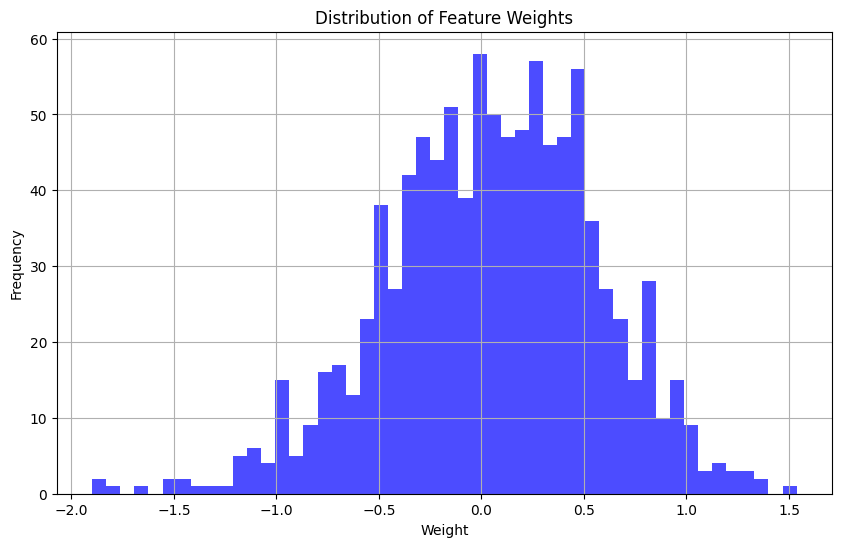

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Labels')

Text(70.72222222222221, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

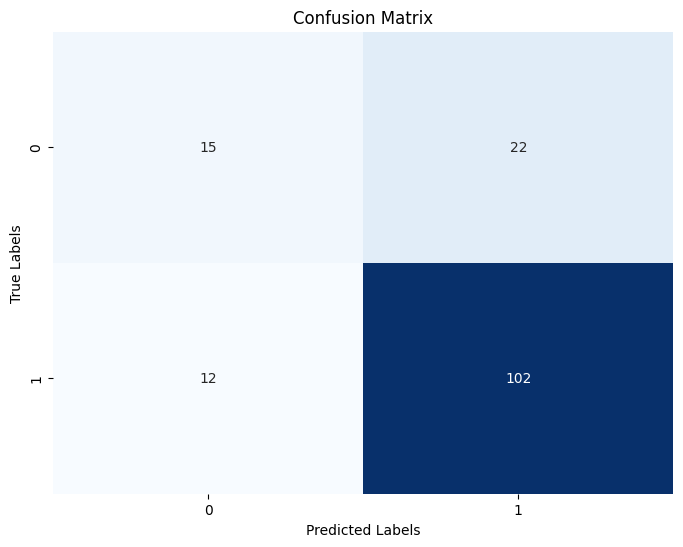

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=1000)
x_train_count = vectorizer.fit_transform(X_train)
x_test_count = vectorizer.transform(X_test)

perc = Perceptron()
perc.fit(x_train_count, Y_train)
y_pred = perc.predict(x_test_count)

f1 = f1_score(Y_test, y_pred, average='weighted')  # You can change 'weighted' to other options if needed
print(f"F1 Score: {f1:.4f}")

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

feature_names = vectorizer.get_feature_names_out()

# Get the coefficients of the Perceptron model
coefficients = perc.coef_

# Combine feature names and coefficients into a dictionary
features_coefficients = dict(zip(feature_names, coefficients[0]))

# Sort the dictionary by coefficient value (weight)
sorted_features = sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)

# Print top 10 words
print("Top 20 words:")
for feature, coefficient in sorted_features[:20]:
    print(f"{feature}: {coefficient:.4f}")

# Print bottom 10 words
print("\nBottom 20 words:")
for feature, coefficient in sorted_features[-20:]:
    print(f"{feature}: {coefficient:.4f}")


plt.figure(figsize=(10, 6))
plt.hist(coefficients[0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.grid(True)
plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Create a heatmap with the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [24]:
df_predicted.to_csv('classification_results.csv',index=False)